In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Data Collection and Basic Understading about data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/data /Bigmart Sales Prediction/Train.csv")

In [3]:
df.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


In [4]:
df.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8368,NCM19,12.65,Low Fat,0.047333,Others,113.8202,OUT045,2002,NaN,Tier 2,Supermarket Type1,1800.3232


In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


ALL Categorical Feature
1. Item_Identifier
2.Item_Fat_Content
3.Item_Type
4.Outlet_Identifier
5.Outlet_Size
6.Outlet_Location_Type
7.Outlet_Type



Check for missing Value

In [8]:
#how manu perccentage dat is missing in dataset
#df.isnull().mean()*100

In [9]:
#find the missing value (for Item Weight = mean)(for Outlet_Size = mode)
mean_item_weight = df["Item_Weight"].mean()
print(mean_item_weight)

12.857645184135976


In [10]:
#fill he missing value
# average = mean
# most Repeted value = Mode
df["Item_Weight"].fillna(mean_item_weight ,inplace = True)

In [11]:
#fill the missing value of Outlet_Size column = mode (most frequent Value)
mode_outlet_size =df["Outlet_Size"].mode()
print(mode_outlet_size)

0    Medium
Name: Outlet_Size, dtype: object


In [12]:
#from sklearn.compose import ColumnTransformer
#from sklearn.impute import SimpleImputer


In [13]:
#imputer = SimpleImputer(strategy= 'most_frequent')

In [14]:
#trf = ColumnTraformer([('imput',imputer, ['Outlet_Size'])

In [15]:
# first way is to fill by mode
#sec way  is to fill by pivot table (it is good )
#Pivot table is a statistical table that summarizes a substantial table like big datasets.
#mode_outlet_size = df.pivot_table(values=['Outlet_Size'],
                                   #columns= ['Outlet_Type'],
                                   #aggfunc= (lambda x:x.mode()[0]))

In [16]:
#print(mode_outlet_size)

In [17]:
# fill the values acccording to mode_outlet_size
#df.loc[missing_value , 'Outlet_size'] =df.loc[missing_value,'Outlet_Type'].apply(lambda x:mode_outlet_size)

In [18]:
#df.drop(df.columns[-1], axis=1 ,inplace = True)

In [19]:
df['Outlet_Size'].fillna('medium',inplace =True)


In [20]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [21]:
#all numericak column
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<ipython-input-22-0999d6e49662>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

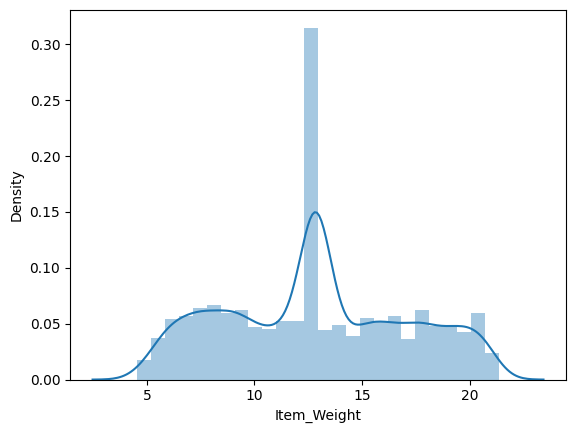

In [22]:
#plot all numerical columns
#find the distribution of all column
sns.distplot(df['Item_Weight'])

<ipython-input-23-686ffc08fab6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

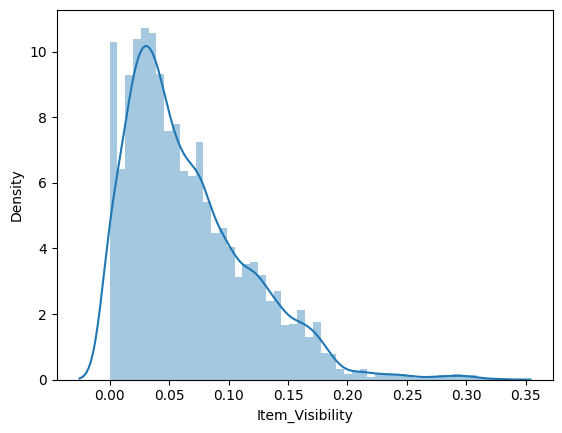

In [23]:
sns.distplot(df['Item_Visibility'])

<ipython-input-24-cd5761e8e3f5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

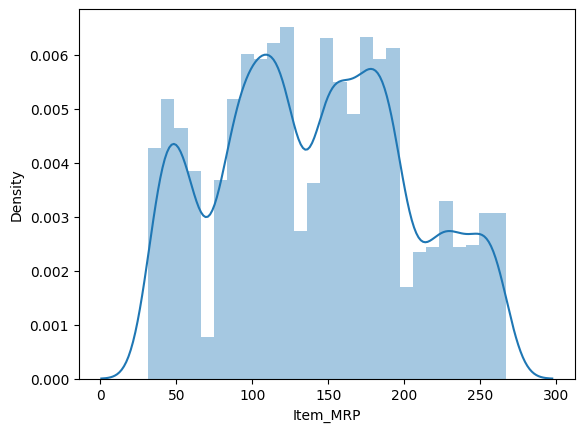

In [24]:
sns.distplot(df['Item_MRP'])

#most of the item values are lie between 80 -200 dollor

<ipython-input-25-db3ed12f69e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

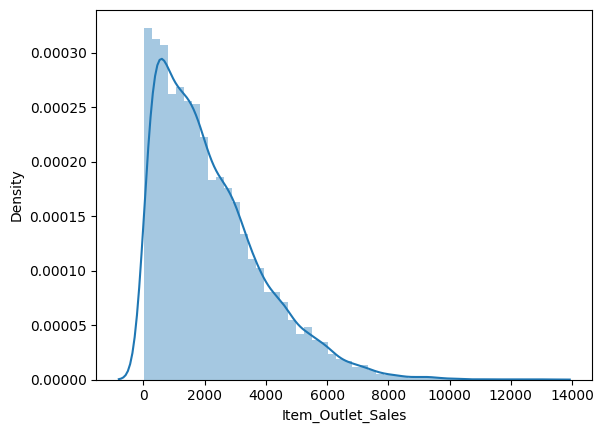

In [25]:
sns.distplot(df['Item_Outlet_Sales'])

#most of the sales is between 0-2000$

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<Axes: xlabel='Item_Fat_Content', ylabel='count'>

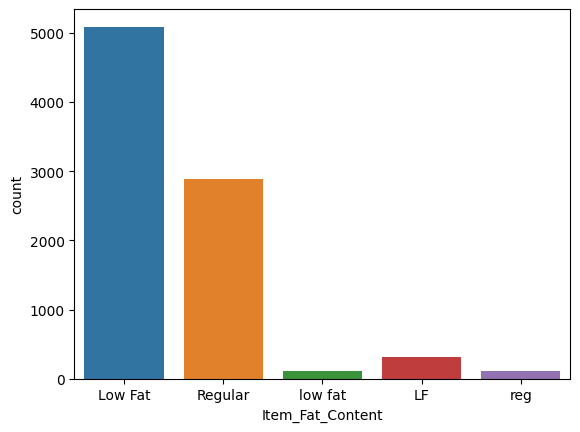

In [27]:
#now plot the categorical column
sns.countplot( x= 'Item_Fat_Content' , data = df)

here the low fat means = Low Fat and LF= Low Fat  ,reg = regular so we cchage the value

In [28]:
#we using replace method
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
df.replace({'Item_Fat_Content':{'Low_Fat':'Low Fat','LF':'Low Fat','reg':'Regular',}},inplace=True )

In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64

#lableEncoder
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type

In [31]:
encoder=LabelEncoder()

In [32]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


#TO do train test split

In [36]:
x= df.iloc[:,1:11]
y = df.iloc[:,-1]

In [37]:
print(x)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 1         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 1         0.000000          6  182.0950   
4           8.930                 0         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 1         0.046982          0  108.1570   
8520       10.600                 0         0.035186          8   85.1224   
8521        7.210                 1         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0       

In [38]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Train test split

In [39]:
x_train,x_test,y_train,y_test =train_test_split(x,y ,test_size =0.2)

In [44]:
y_train.isnull().sum()

0

# model building XGBRegressor

In [41]:
xgb = XGBRegressor()

In [46]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:
y_pred = xgb.predict(x_test)

In [51]:
acccuray = metrics.r2_score(y_test , y_pred)

In [52]:
print(acccuray)

0.5530750295049178
